In [ ]:
#1.Write a program to demonstrate the working of the decision tree. Use an
#   given data set for building the decision tree and apply this knowledge to
#   classify a new sample.
#   Dataset name: weatherdata.csv

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("weatherdata.csv")

# Convert categorical variables to numerical
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Split dataset into features and target
X = df.drop('Answer', axis=1)
y = df['Answer']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# New sample to classify
new_sample = [[2, 1, 0, 1]]  # For example, [Outlook: overcast, Temperature: cool, Humidity: normal, Wind: strong]

# Predict using the trained classifier
predicted = clf.predict(new_sample)
predicted_answer = label_encoders['Answer'].inverse_transform(predicted)
print("Predicted answer for the new sample:", predicted_answer[0])


Accuracy: 0.25
Predicted answer for the new sample: yes


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
#2. Imagine that you are a medical researcher compiling data for a study.
#    You have collected data about a set of patients, all of whom suffered from
the same illness. During their course of treatment, each patient responded
#    to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
#    Part of your job is to build a model to find out which drug might be
#    appropriate for a future patient with the same illness. The feature sets of
#    this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and
#   the target is the drug that each patient responded to.
#   It is a sample of binary classifier, and you can use the training part of the
#   dataset to build a decision tree, and then use it to predict the class of a
#   unknown patient, or to prescribe it to a new patient.
#   Dataset name:drugdata.csv

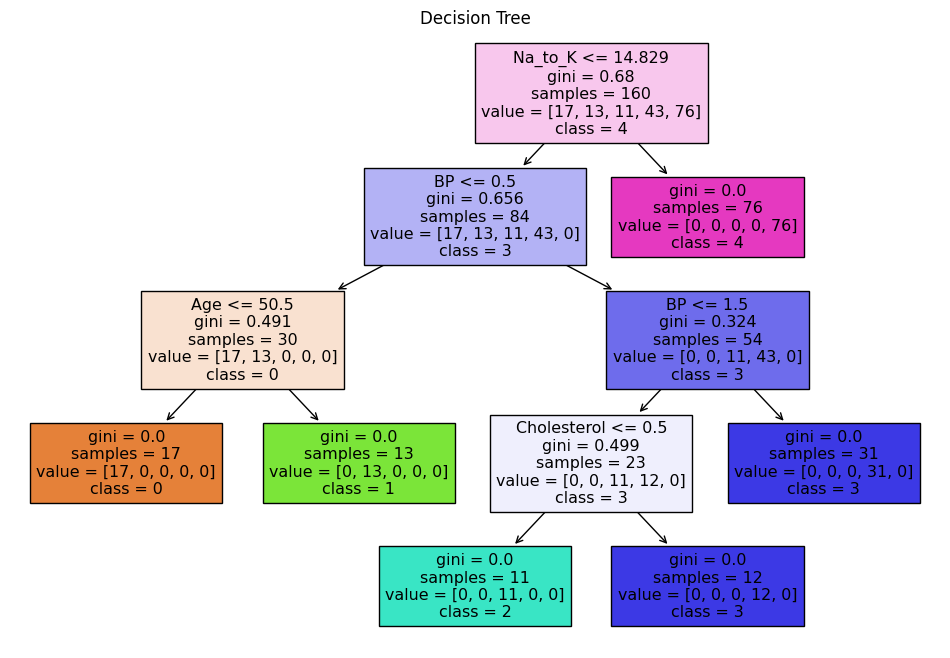

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but DecisionTreeClassifier is expecting 6 features as input.

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

data = pd.read_csv('drugdata.csv')
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

X = data.drop(columns=['Drug'])
y = data['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_])
plt.title("Decision Tree")
plt.show()

new_patient = [[35, 1, 0, 0, 25]]
prediction = clf.predict(new_patient)
print("Predicted drug for the new patient:", prediction)
